## JSON 
(англ. JavaScript Object Notation) — текстовый формат обмена данными, основанный на JavaScript.

In [18]:
import json

#### Из JSON в Python:

In [19]:
json_string = '{"first_name": "Guido", "last_name":"Rossum"}'
parsed_json = json.loads(json_string)
parsed_json

{'first_name': 'Guido', 'last_name': 'Rossum'}

In [20]:
print(parsed_json['first_name'])

Guido


#### Из Python в JSON:

In [21]:
d = {
    'first_name': 'Guido',
    'second_name': 'Rossum',
    'titles': ['BDFL', 'Developer'],
}

print(json.dumps(d))

{"first_name": "Guido", "second_name": "Rossum", "titles": ["BDFL", "Developer"]}


#### Типы в JSON:

In [22]:
json.dumps(['foo', {'bar': ('baz', None, True, 1.0, 2)}])

'["foo", {"bar": ["baz", null, true, 1.0, 2]}]'

In [23]:
json.loads('["foo", {"bar": ["baz", null, true, 1.0, 2]}]')

['foo', {'bar': ['baz', None, True, 1.0, 2]}]

#### Unicode:

In [24]:
print(json.dumps('привет мир!'))

"\u043f\u0440\u0438\u0432\u0435\u0442 \u043c\u0438\u0440!"


#### Compact encoding:

In [25]:
json.dumps([1, 2, 3, {'4': 5, '6': 7}], separators=(',', ':'))

'[1,2,3,{"4":5,"6":7}]'

#### Pretty printing:

In [26]:
print(json.dumps({'4': 5, '6': 7}, sort_keys=True, indent=4))

{
    "4": 5,
    "6": 7
}


#### Работа с файлами:

In [27]:
with open('train.json', 'w') as json_file:
    json.dump({'4': 5, '6': 7}, json_file)

In [28]:
with open('train.json') as json_file:
    json_parsed = json.load(json_file)
print(json_parsed)

{'4': 5, '6': 7}


#### Неочевидные моменты:

1) ключами в словаре могут быть только строчки:

In [29]:
json.loads('{1: 2}')

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

2) строчки обрамляются только двойными кавычками: 

In [30]:
json.loads("'string'")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

3) в JSON нельзя поместить set:

In [31]:
my_set = set((1,2,3))
json.dumps(my_set)

TypeError: Object of type 'set' is not JSON serializable

### Решаем на семинаре:

1. (1 балл) Телефонный справочник.
Создайте dict, в котором в ключах будут имена, а в значениях - телефонные номера. Преобразуйте его в json-файл с помощью функции json.dump

2. (1 балл) Прочитайте файл json_task1.json -> сконвертируйте в python-объект (функция json.load) -> выведите слово "world" (оно является значением во вложенном dict'е)

3. (2 балла) Исправьте синтаксические ошибки в файле json_task2.json и сконвертируйте в python-объект (функция json.load)

## Парсим JSON из Instagram!

In [32]:
import requests

In [36]:
response = requests.get('https://www.instagram.com/explore/tags/hse/?__a=1')
hse_tag_json = response.json()

In [37]:
import pandas as pd

In [38]:
df = pd.read_json(json.dumps(hse_tag_json['tag']['media']['nodes']))

In [39]:
df.head()

,caption,code,comments,comments_disabled,date,dimensions,display_src,id,is_video,likes,owner,thumbnail_resources,thumbnail_src
0,رنج روفر فوج اس في داينمك \n٢٠١٧ \nابيض / احمر...,BcMLPQqFot7,{'count': 1},False,2017-12-02 06:44:22,"{'height': 640, 'width': 640}",https://instagram.fhel3-1.fna.fbcdn.net/t51.28...,1660751789782633216,False,{'count': 15},{'id': '1234832025'},[{'src': 'https://instagram.fhel3-1.fna.fbcdn....,https://instagram.fhel3-1.fna.fbcdn.net/t51.28...
1,Не люблю ожидания......\n.\n#вшэ #пермь #вшэпе...,BcMKq3TATe9,{'count': 1},False,2017-12-02 06:39:24,"{'height': 1350, 'width': 1080}",https://instagram.fhel3-1.fna.fbcdn.net/t51.28...,1660749288650651648,False,{'count': 5},{'id': '3660688349'},[{'src': 'https://instagram.fhel3-1.fna.fbcdn....,https://instagram.fhel3-1.fna.fbcdn.net/t51.28...
2,Доброе снежное утро))\n#2017#hse#study#decembe...,BcMJd0wgb6X,{'count': 1},False,2017-12-02 06:28:53,"{'height': 1080, 'width': 1080}",https://instagram.fhel3-1.fna.fbcdn.net/t51.28...,1660743994524679936,False,{'count': 19},{'id': '1698051068'},[{'src': 'https://instagram.fhel3-1.fna.fbcdn....,https://instagram.fhel3-1.fna.fbcdn.net/t51.28...
3,"#mlh, #github, #hse, #hack, #hackathon",BcMIE7rnd2f,{'count': 1},False,2017-12-02 06:16:45,"{'height': 1080, 'width': 1080}",https://instagram.fhel3-1.fna.fbcdn.net/t51.28...,1660737885925400064,False,{'count': 13},{'id': '478419556'},[{'src': 'https://instagram.fhel3-1.fna.fbcdn....,https://instagram.fhel3-1.fna.fbcdn.net/t51.28...
4,#thejungle \n#thejunglebogor \n#hse,BcMHMTnB-H5,{'count': 0},False,2017-12-02 06:09:01,"{'height': 608, 'width': 1080}",https://instagram.fhel3-1.fna.fbcdn.net/t51.28...,1660733994608091648,False,{'count': 4},{'id': '4982691283'},[{'src': 'https://instagram.fhel3-1.fna.fbcdn....,https://instagram.fhel3-1.fna.fbcdn.net/t51.28...


In [40]:
df['likes_count'] = df['likes'].map(lambda x: x['count'])

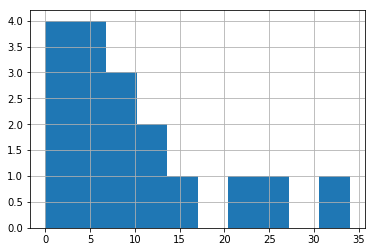

In [17]:
%matplotlib inline
df['likes_count'].hist()

In [41]:
import seaborn as sns

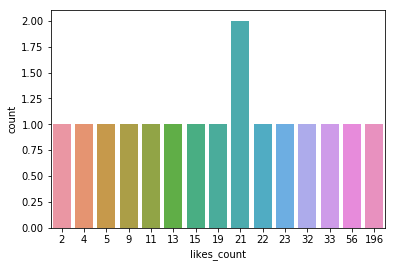

In [43]:
sns.countplot(df['likes_count'])

In [46]:
df['comments_count'] = df['comments'].map(lambda x: x['count'])

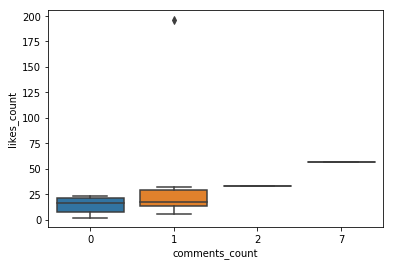

In [51]:
sns.boxplot(x='comments_count', y='likes_count', data=df)

### Блиц!

(2 балла) С помощью функции pandas['column_name'].map() преобразуйте колонку dimensions из dict'ов в числа. Создайте новые колонки height, width, которые будут содержать количество высоту и ширину фотографии.

### Бонус (если успеем)

Было бы здорово скачать несколько страничек, а то данных мало...

In [53]:
max_id = ''
has_next_page = True

nodes = []

for i in range(10):
    if not has_next_page:
        break
    resp = requests.get('https://www.instagram.com/explore/tags/hse/?__a=1'.format(max_id)).json()
    
    nodes += hse_tag_json['tag']['media']['nodes']

    if resp['tag']['media']['page_info']['has_next_page']:
        max_id = '&max_id=' + resp['tag']['media']['page_info']['end_cursor']
    else:
        has_next_page = False

In [54]:
df_big = pd.read_json(json.dumps(nodes))

## Домашнее задание:

1. (3 балла) Составьте несколько pandas.DataFrame с "top_posts" Инстаграма для разных локаций. Для этого понадобится найти ссылку на страничку с локацией: ее можно получить из адреса сайта при поиске в десктопе: <img src="location.png"><br>
Для N.Y. ссылка выглядит так: https://www.instagram.com/explore/locations/212988663/new-york-new-york/ . Соответственно, ссылка с json-ом выглядит так: https://www.instagram.com/explore/locations/212988663/new-york-new-york/?__a=1 <br>
Давайте возьмем Нью-Йорк, Париж, Рим, Берлин, Нью-Дели и Минск.

2. (3 балла) Для каждого DataFrame'a создайте новую колонку 'location', в которую (для каждой строчки) положите название локации. Объедините все DataFrame'ы в одну функцию pd.concat([df1, df2, df3...])

3. (3 балла) Постройте box plot, в котором на одном графике отобразите количество лайков для разных локаций. По x - локации, по y - количество лайков. Выглядеть должно примерно так: <img src="https://plot.ly/~cufflinks/35/a-b-c-d-e.png">